In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [2]:
train_ds ,val_ds= tf.keras.utils.image_dataset_from_directory("/Users/mohamedkhalaf/Programming/PY/raw-img",validation_split=0.2,image_size=(160,160),batch_size=16,subset='both',seed=1)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Using 5235 files for validation.


In [3]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

In [4]:
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))

In [5]:
base_model= tf.keras.applications.MobileNetV2(input_shape=(160,160,3),include_top=False,weights='mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_160_no_top.h5')

In [6]:
inputs = base_model.input
base_model.trainable=False
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(units=128,activation='relu')(x)
outputs = tf.keras.layers.Dense(10,activation='softmax')(x)
model = tf.keras.Model(inputs=inputs,outputs=outputs)


In [7]:
lr = 0.0001

In [8]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr),
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy']
)

In [9]:
history = model.fit(train_ds,validation_data=val_ds,epochs=3,
          callbacks=tf.keras.callbacks.ModelCheckpoint('best_model.keras'))

Epoch 1/3
   6/1309 ━━━━━━━━━━━━━━━━━━━━ 1:19 61ms/step - accuracy: 0.1750 - loss: 2.3059

2025-05-27 18:02:16.686297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 102/1309 ━━━━━━━━━━━━━━━━━━━━ 1:13 61ms/step - accuracy: 0.3106 - loss: 2.0634

2025-05-27 18:02:22.560907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 418/1309 ━━━━━━━━━━━━━━━━━━━━ 53s 60ms/step - accuracy: 0.5499 - loss: 1.4469

2025-05-27 18:02:41.411060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 448/1309 ━━━━━━━━━━━━━━━━━━━━ 51s 60ms/step - accuracy: 0.5614 - loss: 1.4128

2025-05-27 18:02:43.193207: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 602/1309 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.6087 - loss: 1.2705

2025-05-27 18:02:52.385053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 618/1309 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.6127 - loss: 1.2581

2025-05-27 18:02:53.377617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 691/1309 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.6298 - loss: 1.2059

2025-05-27 18:02:57.755204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 724/1309 ━━━━━━━━━━━━━━━━━━━━ 35s 60ms/step - accuracy: 0.6367 - loss: 1.1844

2025-05-27 18:02:59.729810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 744/1309 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - accuracy: 0.6408 - loss: 1.1720

2025-05-27 18:03:00.936622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 778/1309 ━━━━━━━━━━━━━━━━━━━━ 31s 60ms/step - accuracy: 0.6473 - loss: 1.1517

2025-05-27 18:03:02.967206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:03:03.142771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 795/1309 ━━━━━━━━━━━━━━━━━━━━ 30s 60ms/step - accuracy: 0.6504 - loss: 1.1420

2025-05-27 18:03:03.997984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 799/1309 ━━━━━━━━━━━━━━━━━━━━ 30s 60ms/step - accuracy: 0.6512 - loss: 1.1398

2025-05-27 18:03:04.241382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 812/1309 ━━━━━━━━━━━━━━━━━━━━ 29s 60ms/step - accuracy: 0.6535 - loss: 1.1325

2025-05-27 18:03:05.033611: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 860/1309 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - accuracy: 0.6616 - loss: 1.1070

2025-05-27 18:03:07.923677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 874/1309 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - accuracy: 0.6639 - loss: 1.0999

2025-05-27 18:03:08.760950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 945/1309 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.6747 - loss: 1.0661

2025-05-27 18:03:13.018400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1076/1309 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.6917 - loss: 1.0119

2025-05-27 18:03:21.032740: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1309/1309 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7157 - loss: 0.9350

2025-05-27 18:03:39.299193: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:03:51.935559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:03:52.543488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:03:52.596476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1309/1309 ━━━━━━━━━━━━━━━━━━━━ 100s 75ms/step - accuracy: 0.7158 - loss: 0.9347 - val_accuracy: 0.9436 - val_loss: 0.1941
Epoch 2/3
  32/1309 ━━━━━━━━━━━━━━━━━━━━ 1:23 65ms/step - accuracy: 0.9161 - loss: 0.2579

2025-05-27 18:03:56.942064: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 104/1309 ━━━━━━━━━━━━━━━━━━━━ 1:16 64ms/step - accuracy: 0.9096 - loss: 0.2877

2025-05-27 18:04:01.509964: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 433/1309 ━━━━━━━━━━━━━━━━━━━━ 56s 64ms/step - accuracy: 0.9032 - loss: 0.3075

2025-05-27 18:04:22.553380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 474/1309 ━━━━━━━━━━━━━━━━━━━━ 53s 64ms/step - accuracy: 0.9033 - loss: 0.3078

2025-05-27 18:04:25.174172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 622/1309 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 0.9030 - loss: 0.3090

2025-05-27 18:04:35.228670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 630/1309 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 0.9030 - loss: 0.3089

2025-05-27 18:04:35.748048: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 708/1309 ━━━━━━━━━━━━━━━━━━━━ 39s 65ms/step - accuracy: 0.9031 - loss: 0.3086

2025-05-27 18:04:40.947482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 735/1309 ━━━━━━━━━━━━━━━━━━━━ 37s 65ms/step - accuracy: 0.9031 - loss: 0.3085

2025-05-27 18:04:42.686722: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 767/1309 ━━━━━━━━━━━━━━━━━━━━ 35s 65ms/step - accuracy: 0.9031 - loss: 0.3083

2025-05-27 18:04:44.774009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 782/1309 ━━━━━━━━━━━━━━━━━━━━ 34s 65ms/step - accuracy: 0.9032 - loss: 0.3082

2025-05-27 18:04:45.758895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:04:45.952816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 803/1309 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - accuracy: 0.9032 - loss: 0.3081

2025-05-27 18:04:47.122597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 813/1309 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - accuracy: 0.9032 - loss: 0.3080

2025-05-27 18:04:47.767466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 825/1309 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.9033 - loss: 0.3079

2025-05-27 18:04:48.615434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 881/1309 ━━━━━━━━━━━━━━━━━━━━ 27s 65ms/step - accuracy: 0.9034 - loss: 0.3075

2025-05-27 18:04:52.280421: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 885/1309 ━━━━━━━━━━━━━━━━━━━━ 27s 65ms/step - accuracy: 0.9034 - loss: 0.3075

2025-05-27 18:04:52.542214: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 963/1309 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.9036 - loss: 0.3070

2025-05-27 18:04:57.768329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1084/1309 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.9039 - loss: 0.3062

2025-05-27 18:05:05.754260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1309/1309 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9044 - loss: 0.3046

2025-05-27 18:05:24.687258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:05:37.882002: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:05:38.449534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:05:38.513230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1309/1309 ━━━━━━━━━━━━━━━━━━━━ 106s 81ms/step - accuracy: 0.9044 - loss: 0.3046 - val_accuracy: 0.9452 - val_loss: 0.1772
Epoch 3/3
  21/1309 ━━━━━━━━━━━━━━━━━━━━ 1:30 70ms/step - accuracy: 0.9394 - loss: 0.2084

2025-05-27 18:05:42.327028: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 102/1309 ━━━━━━━━━━━━━━━━━━━━ 1:22 69ms/step - accuracy: 0.9242 - loss: 0.2391

2025-05-27 18:05:47.804272: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 437/1309 ━━━━━━━━━━━━━━━━━━━━ 1:01 71ms/step - accuracy: 0.9171 - loss: 0.2659

2025-05-27 18:06:11.819807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 460/1309 ━━━━━━━━━━━━━━━━━━━━ 1:01 72ms/step - accuracy: 0.9169 - loss: 0.2666

2025-05-27 18:06:14.058448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 619/1309 ━━━━━━━━━━━━━━━━━━━━ 55s 80ms/step - accuracy: 0.9165 - loss: 0.2691

2025-05-27 18:06:30.347680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 627/1309 ━━━━━━━━━━━━━━━━━━━━ 54s 80ms/step - accuracy: 0.9165 - loss: 0.2692

2025-05-27 18:06:31.248947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 705/1309 ━━━━━━━━━━━━━━━━━━━━ 51s 85ms/step - accuracy: 0.9165 - loss: 0.2693

2025-05-27 18:06:40.747336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 739/1309 ━━━━━━━━━━━━━━━━━━━━ 48s 86ms/step - accuracy: 0.9166 - loss: 0.2693

2025-05-27 18:06:44.257359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 751/1309 ━━━━━━━━━━━━━━━━━━━━ 48s 86ms/step - accuracy: 0.9166 - loss: 0.2693

2025-05-27 18:06:45.753185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 777/1309 ━━━━━━━━━━━━━━━━━━━━ 47s 89ms/step - accuracy: 0.9166 - loss: 0.2692

2025-05-27 18:06:49.767924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 787/1309 ━━━━━━━━━━━━━━━━━━━━ 46s 89ms/step - accuracy: 0.9166 - loss: 0.2692

2025-05-27 18:06:50.757518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 803/1309 ━━━━━━━━━━━━━━━━━━━━ 45s 89ms/step - accuracy: 0.9166 - loss: 0.2692

2025-05-27 18:06:52.320847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 811/1309 ━━━━━━━━━━━━━━━━━━━━ 44s 89ms/step - accuracy: 0.9166 - loss: 0.2692

2025-05-27 18:06:53.320382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 825/1309 ━━━━━━━━━━━━━━━━━━━━ 43s 89ms/step - accuracy: 0.9166 - loss: 0.2691

2025-05-27 18:06:54.654857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 879/1309 ━━━━━━━━━━━━━━━━━━━━ 38s 89ms/step - accuracy: 0.9167 - loss: 0.2690

2025-05-27 18:06:59.346606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 887/1309 ━━━━━━━━━━━━━━━━━━━━ 37s 89ms/step - accuracy: 0.9167 - loss: 0.2689

2025-05-27 18:07:00.002184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 957/1309 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - accuracy: 0.9167 - loss: 0.2686

2025-05-27 18:07:05.747518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1089/1309 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.9169 - loss: 0.2678

2025-05-27 18:07:16.349683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1309/1309 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9171 - loss: 0.2668

2025-05-27 18:07:36.466182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:07:49.456163: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:07:50.009333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:07:50.070242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1309/1309 ━━━━━━━━━━━━━━━━━━━━ 133s 101ms/step - accuracy: 0.9171 - loss: 0.2667 - val_accuracy: 0.9479 - val_loss: 0.1634


Text(0.5, 1.0, 'Loss')

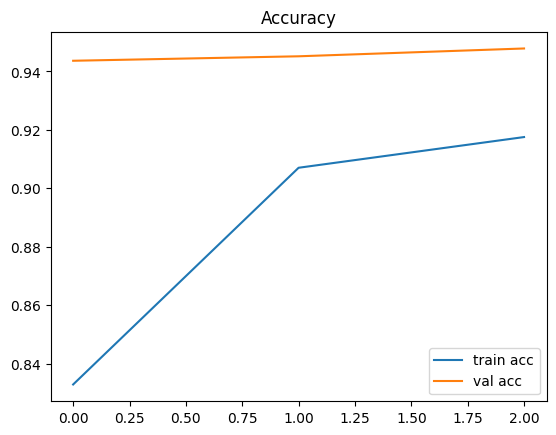

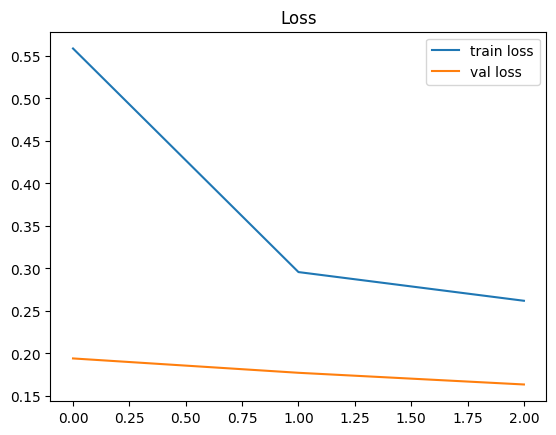

In [10]:

# Plot training vs. validation accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')

plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

In [13]:
model.save('my_mobilenetv2_model.keras')